<a href="https://colab.research.google.com/github/SamahAliIriqat/Adult-Income/blob/main/Project2_Part11_SAMAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load the dataset**

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pd.set_option('display.max_columns',200)
pd.set_option("display.max_info_rows", 800)
pd.set_option('display.max_info_columns',800)

from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/03-Intermediate Machine Learning/project2/adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Basic EDA**

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [ ]:
df.dtypes.value_counts()

,count
object,9
int64,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum().sum()

0

In [ ]:
# Check for missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


In [ ]:
for column in df.select_dtypes(include=['category']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# Updated column names to match the DataFrame
# Check column names in the DataFrame
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Use the column variable to select the column and calculate the mean
      df.fillna({column: df[column].mean()}, inplace=True)

**2. Define X and y, with "Diabetess_Risk" as the target vector (y)**





In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check existing column names
print(df.columns)

# Assuming the actual categorical column is named 'workclass'
categorical_column_name = 'workclass'
le = LabelEncoder()
df[categorical_column_name] = le.fit_transform(df[categorical_column_name])

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


Available numerical columns: Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')


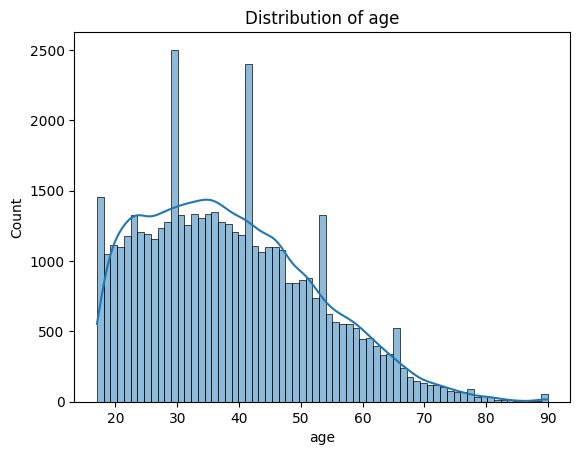

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the list of numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the available numerical columns to check for the correct name
print(f"Available numerical columns: {numerical_columns}")

# Choose the correct numerical column name from the list
chosen_column = 'age'

# Plot the distribution of the chosen feature
sns.histplot(df[chosen_column], kde=True)
plt.title(f'Distribution of {chosen_column}')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the list of numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the available numerical columns to check for the correct name
print(f"Available numerical columns: {numerical_columns}")

# Choose the correct numerical column name from the list
# For example, if the desired column is named 'age', replace 'numerical_feature' with 'age'
chosen_column = 'workclass' #

# Plot the distribution of the chosen feature
sns.histplot(df[chosen_column], kde=True)
plt.title(f'Distribution of {chosen_column}')
plt.show()

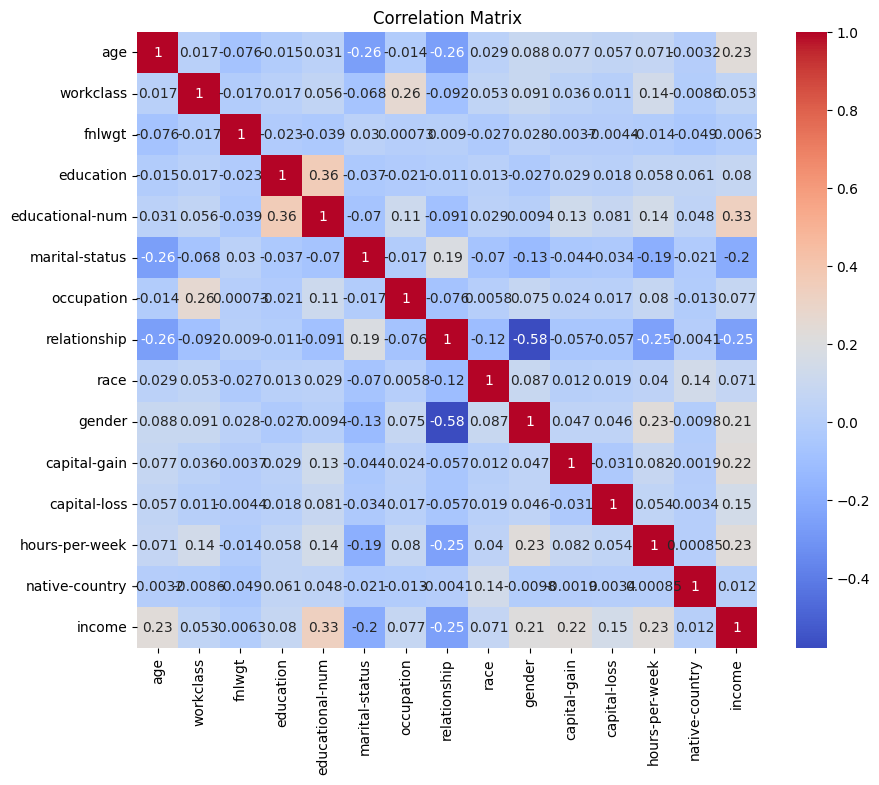

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'education' column to numerical representation using Label Encoding or One-Hot Encoding
# Assuming 'education' is the column with '11th' and other categorical values
for column in df.select_dtypes(include=['object']).columns:
    # Use Label Encoding
    df[column] = le.fit_transform(df[column])  # Indented this line

    # Or Use One-Hot Encoding if the categories are not ordinal
    # df = pd.get_dummies(df, columns=[column], prefix=[column])

# Removed duplicate for loop
# The original code had the same loop twice, which was unnecessary

plt.figure(figsize=(10, 8))
# Calculate correlation only for numerical features
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# **Replace 'target_column' with the actual name of your target column**
# For example, if your target column is named 'income', change the code to:
target_column_name = 'income'  # Replace 'income' with your actual target column name

# Define target and features
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.8597048575527773
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7440
           1       0.75      0.62      0.68      2318

    accuracy                           0.86      9758
   macro avg       0.82      0.78      0.79      9758
weighted avg       0.85      0.86      0.85      9758



capital-gain: 0.045623912375882945
educational-num: 0.023277715221619456
relationship: 0.022550926399836257
age: 0.01635786672126116
occupation: 0.011997133790562031
capital-loss: 0.009345890060395167
marital-status: 0.007984440577336504
hours-per-week: 0.007677346708977417
workclass: 0.002067765380284614
fnlwgt: 0.0017299621250896013


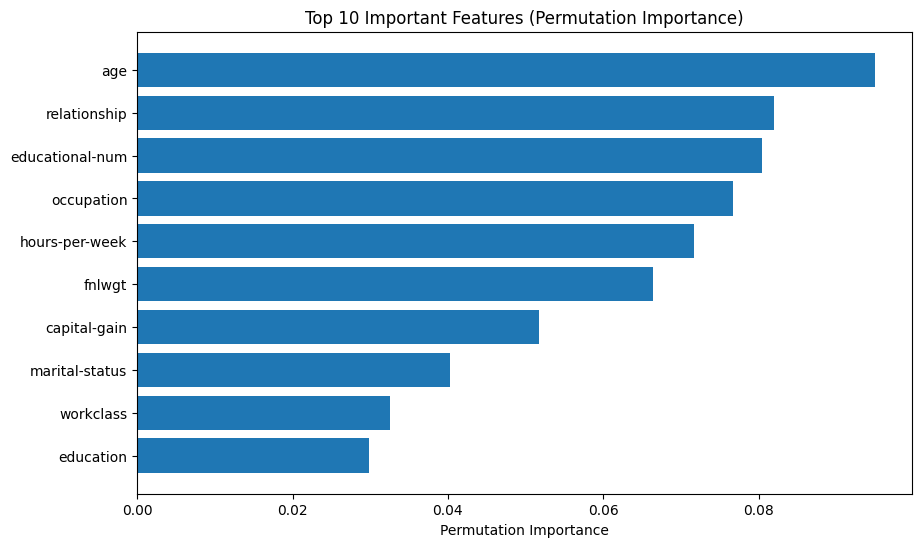

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Convert 'education' column to numerical representation using Label Encoding or One-Hot Encoding
# Assuming 'education' is the column with '11th' and other categorical values
for column in df.select_dtypes(include=['object']).columns:
    # Use Label Encoding
    df[column] = le.fit_transform(df[column])  # Indented this line

    # Or Use One-Hot Encoding if the categories are not ordinal
    # df = pd.get_dummies(df, columns=[column], prefix=[column])

# Removed duplicate for loop
# The original code had the same loop twice, which was unnecessary


# **Replace 'target_column' with the actual name of your target column**
# For example, if your target column is named 'income', change the code to:
target_column_name = 'income'  # Replace 'income' with your actual target column name

# Define target and features
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


from sklearn.inspection import permutation_importance
import numpy as np
#import pandas as pd # Assuming pandas has been imported in previous cells

# Get permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get top 10 important features
importances = perm_importance.importances_mean
indices = importances.argsort()[::-1][:10]

# Print top 10 features
for i in range(10):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# We compute permutation importance on the trained model
results = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Extract importance scores and feature names
importance = results.importances_mean
indices = np.argsort(importance)[::-1]  # Sort in descending order

# Visualize the top 10 features
top_n = 10
top_indices = indices[:top_n]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importance[top_indices], align='center')
plt.yticks(range(top_n), [X.columns[i] for i in top_indices]) # Changed data.feature_names to X.columns
plt.xlabel('Permutation Importance')
plt.title('Top 10 Important Features (Permutation Importance)')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

Do these features make sense based on the business case?

Yes, it make sence; for example capital-gain was the top features, and it affect the income, and the same for other features

**Figure (1): Relationship between capital-gain and income**

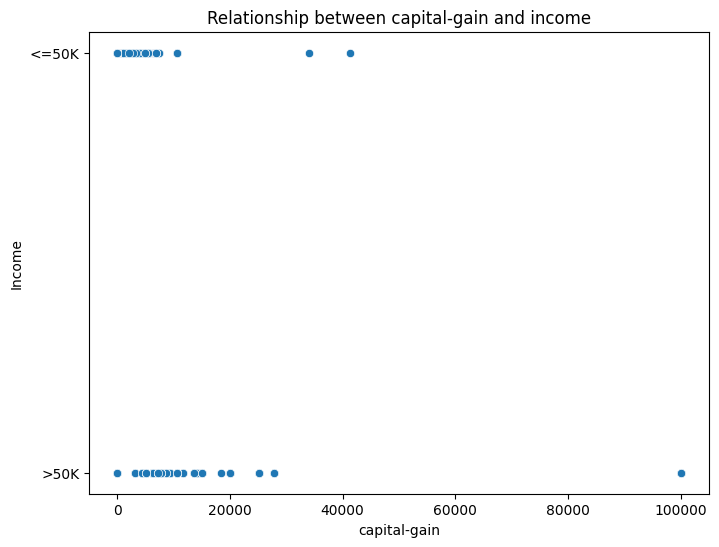

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming you have a dataframe called 'df' and 'income' is your target variable
# and 'capital-gain' is a feature column:

# Split the data into training and testing sets
X = df[['capital-gain']]  # Features
y = df['income']       # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
# Access the 'capital-gain' column using string notation
sns.scatterplot(x=X_test['capital-gain'], y=y_test)
plt.title(f'Relationship between capital-gain and income')
plt.xlabel("capital-gain")
plt.ylabel('Income')
plt.show()

Figure (1) shows that the capital-gain was betwen 0 - 20000 in both categories (<=50, >50), but in category (<=50k) had some observations between  (20000 - 40000)

**Figure (2): Distribution of Income by Relationship**

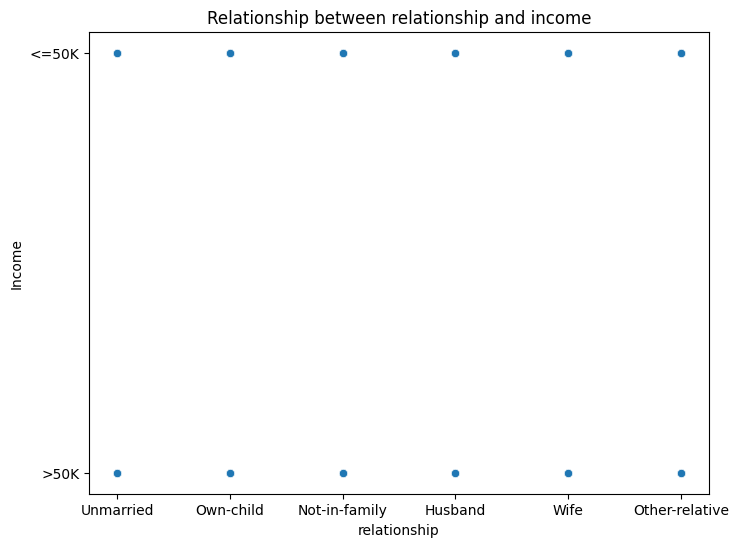

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming you have a dataframe called 'df' and 'income' is your target variable
# and 'relationship', 'capital-gain' are feature columns:

# Update X to include the 'relationship' column
X = df[['relationship', 'capital-gain']]  # Features
y = df['income']       # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['relationship'], y=y_test)
plt.title(f'Relationship between relationship and income')
plt.xlabel("relationship")
plt.ylabel('Income')
plt.show()

Figure (2) shows that the realtionship categories has approximately thesame  distribution in both categories (<=50, >50), but in category (<=50k) had some observations between  (20000 - 40000)

In [ ]:
# import pandas as pd
# Define target and cols to drop
target_col = 'Income'
drop_cols = []

# Print the columns in the DataFrame to verify the existence of the 'Income' column
print(df.columns)

# Check if 'Income' is present in the columns; if not, try alternative names
if target_col not in df.columns:
    # Possible alternatives for 'Income' column
    alternative_names = ['income', 'earnings', 'salary']

    # Check if any alternative name is present in the columns
    for name in alternative_names:
        if name in df.columns:
            target_col = name
            print(f"Using alternative target column: '{target_col}'")
            break
    else:
        raise KeyError(f"Target column '{target_col}' and alternatives not found in DataFrame.")

# Define X and y
y = df[target_col].copy()
X = df.drop(columns=[target_col, *drop_cols]).copy()

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
Using alternative target column: 'income'


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=321)
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
22941,43,4,124692,9,13,2,12,0,4,1,0,0,40,39
14212,42,6,116197,11,9,2,3,0,4,1,0,0,40,39
22859,51,4,125796,1,7,5,8,1,2,0,0,0,40,23
32414,25,2,198813,9,13,4,1,2,2,0,0,0,40,39
42201,24,4,278130,8,11,4,7,1,4,1,0,0,40,39


Using KNN

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

OneHotEncoder Columns: Index([], dtype='object')
Numeric Columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()

In [ ]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Record the time it takes to make predictions
%%time
# Transform the test data using the preprocessor
X_test_tf = preprocessor.transform(X_test)
# Make predictions on the transformed test data
preds = knn.predict(X_test_tf)

CPU times: user 11.8 s, sys: 67.4 ms, total: 11.9 s
Wall time: 16 s


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     27911
           1       0.78      0.68      0.73      8681

    accuracy                           0.88     36592
   macro avg       0.84      0.81      0.83     36592
weighted avg       0.88      0.88      0.88     36592



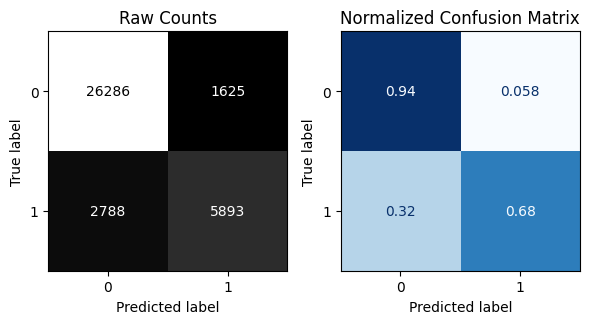


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9198
           1       0.67      0.58      0.63      3000

    accuracy                           0.83     12198
   macro avg       0.77      0.75      0.76     12198
weighted avg       0.82      0.83      0.82     12198



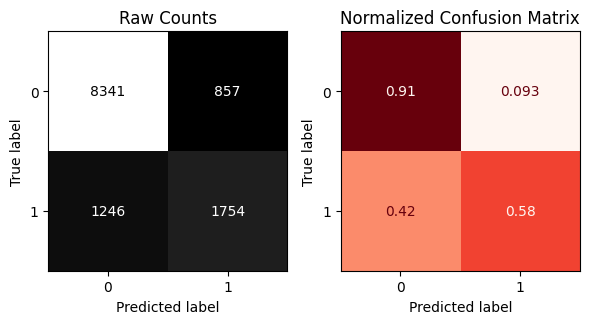

In [ ]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)